In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('bankruptcy-prevention.csv',sep=';')
#first 5 datas
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
#last 5 datas
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [4]:
df.shape

(250, 7)

### EDA

In [6]:
# Renaming the columns names because of uneven spaces in col_names
df.rename(columns={' management_risk':'management_risk',' financial_flexibility':'financial_flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating_risk',' class':'class'},inplace=True)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
print(df['industrial_risk'].value_counts())
print(df['management_risk'].value_counts())
print(df['financial_flexibility'].value_counts())
print(df['credibility'].value_counts())
print(df['competitiveness'].value_counts())
print(df['operating_risk'].value_counts())
print(df['class'].value_counts())

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64
1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64
0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64
0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64
0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64
1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64
non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64


In [10]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

#### In this data there is no null values 

## Data preprocessing
### LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
# converting the categorical data into numerical data
label = label_encoder.fit_transform(df['class'])
df['class'] = label

In [15]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [16]:
df.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1
249,1.0,0.0,0.5,0.5,1.0,1.0,1


## Outlier

<Axes: >

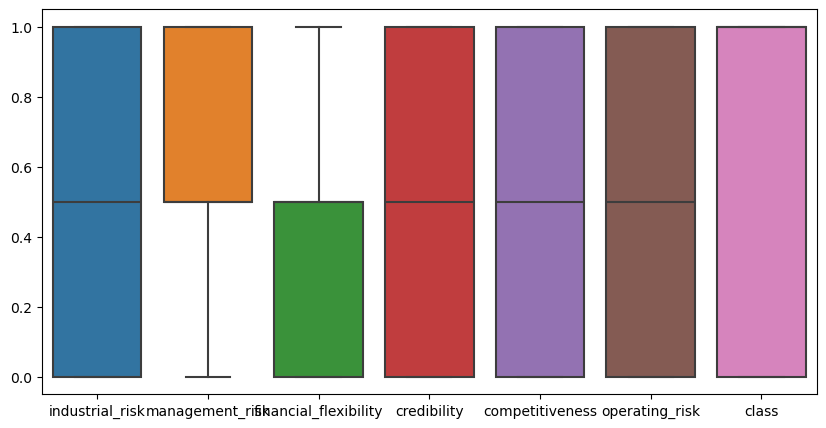

In [18]:
# Checking the outlier by using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df)

### In this data there is no outlier

## Co-relation b/w data

<Axes: >

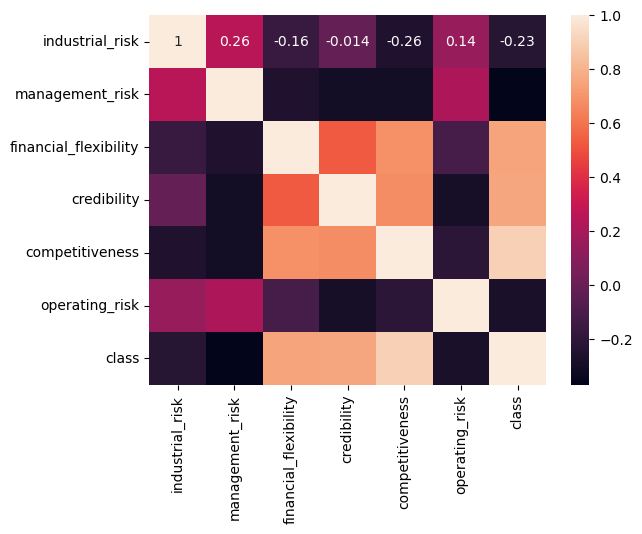

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

In [23]:
a = df['class'].value_counts()

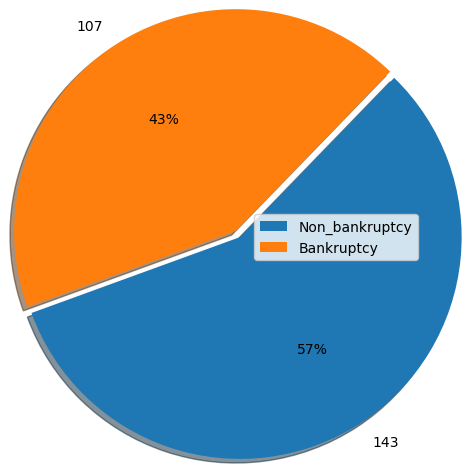

In [24]:
#plt.axis('equal')
labels =('Non_bankruptcy','Bankruptcy')
plt.pie(a,labels=a,radius=1.5, autopct='%0.0f%%', shadow=True,explode=[0,0.05], startangle=200)
plt.savefig("piechart.jpg", bbox_inches="tight", pad_inches=1, transparent=True)
plt.legend(labels,loc='right')
plt.show()

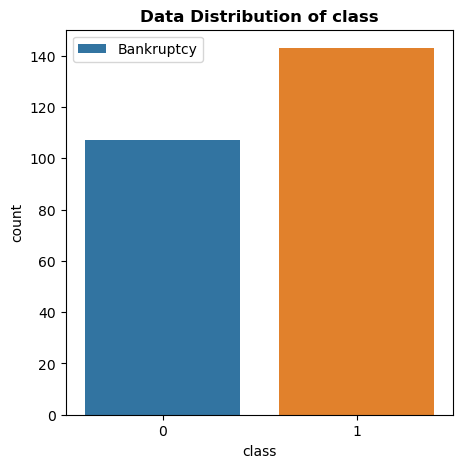

In [25]:
plt.figure(figsize=(5,5))
labels =('Bankruptcy','Non_bankruptcy')
sns.countplot(x=df['class'])
plt.title('Data Distribution of class',fontweight='bold',fontsize='large')
plt.legend(labels)

<Axes: xlabel='class', ylabel='Density'>

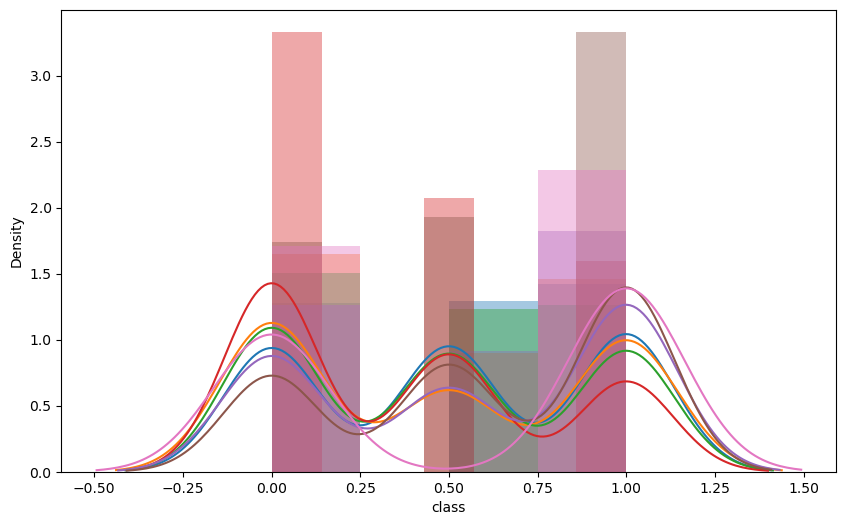

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(df['industrial_risk'])
sns.distplot(df['competitiveness'])
sns.distplot(df['credibility'])
sns.distplot(df['financial_flexibility'])
sns.distplot(df['operating_risk'])
sns.distplot(df['management_risk'])
sns.distplot(df['class'])

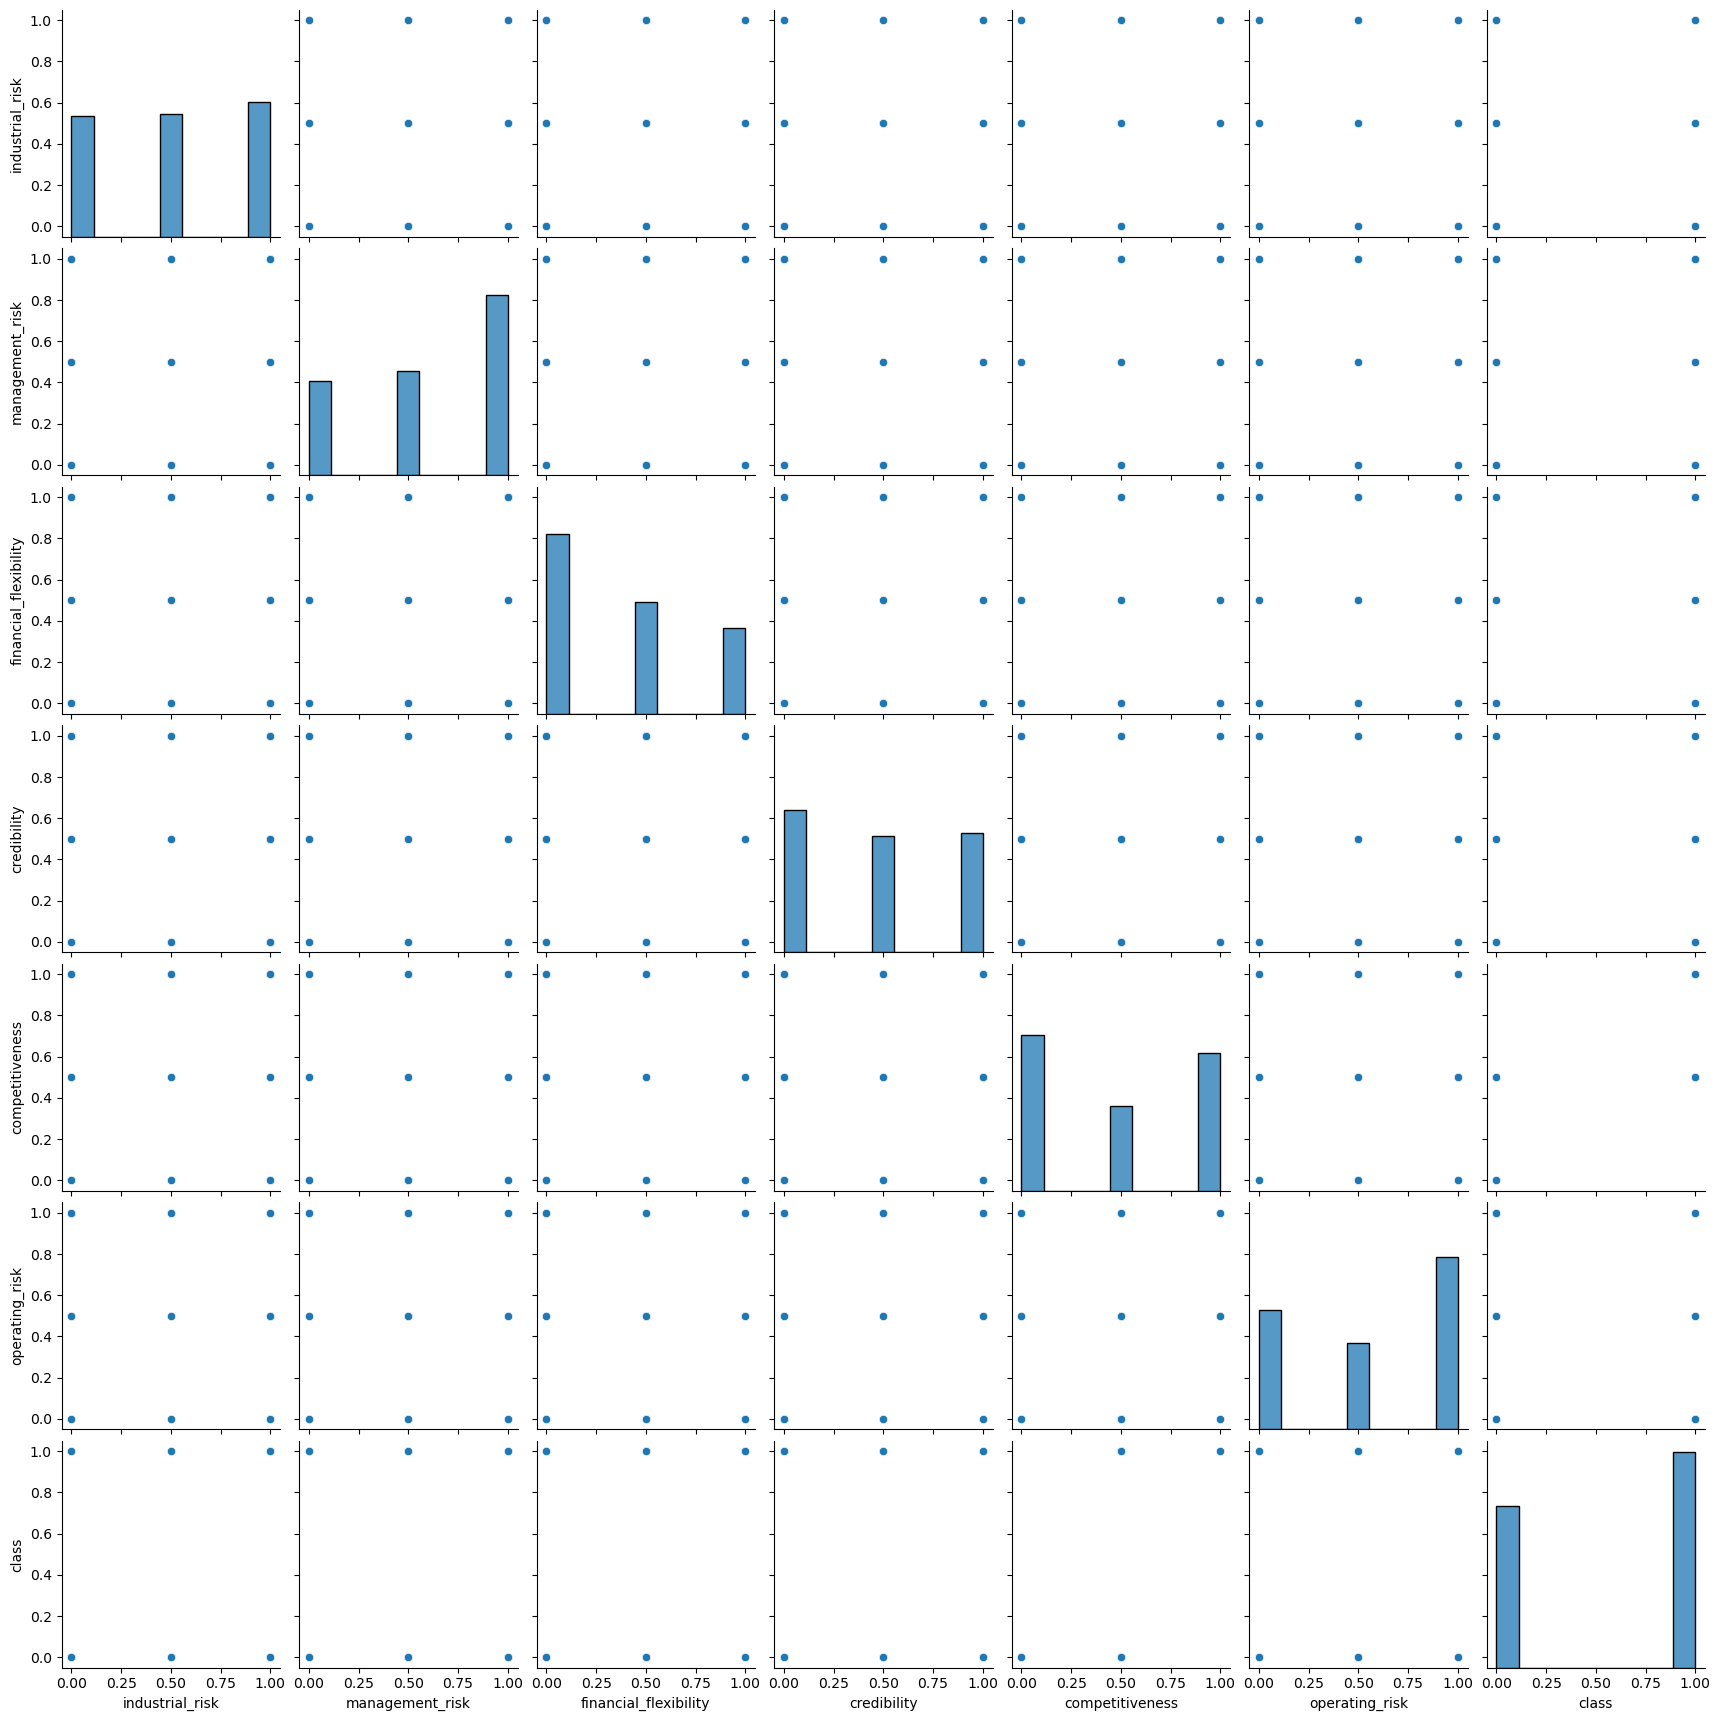

In [27]:
sns.pairplot(df)

In [28]:
features = df.drop('class',axis=1)
features.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [29]:
features.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

In [30]:
target = df[['class']]
target

,class
0,0
1,0
2,0
3,0
4,0
...,...
245,1
246,1
247,1
248,1


## Model building


#### 1. Logistic Regression
#### 2. Naive bays
#### 3. KNN
#### 4. Decision Tree
#### 5. SVM(Support vector machine)
#### 6. Random forest

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [34]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.7,random_state=100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 6)
(75, 6)
(175, 1)
(75, 1)


### 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
def print_score(clf,x_train,y_train,x_test,y_test,train=True):
    if train:
        predict = clf.predict(x_train)
        print('Train Result : \n--------------------')
        print(f'Accuracy score: {accuracy_score(y_train,predict)}')
        print('____________________________________________________')
        print(f'\n Confusion_matrix: \n {confusion_matrix(y_train,predict)}')
        print('____________________________________________________')
        print(f'\n Classification_report: \n {classification_report(y_train,predict)}')
        
    elif train==False:
        pred = clf.predict(x_test)
        print('Test Result : \n--------------------')
        print(f'Accuracy score: {accuracy_score(y_test,pred)}')
        print('____________________________________________________')
        print(f'\n Confusion_matrix: \n {confusion_matrix(y_test,pred)}')
        print('____________________________________________________')
        print(f'\n Classification_report: \n {classification_report(y_test,pred)}')
        

In [40]:
y_pred = logistic_reg.predict(x_test)

In [41]:
logistic_accuracy =accuracy_score(y_test,y_pred)

In [42]:
print_score(logistic_reg, x_train, y_train, x_test, y_test, train=True)
print_score(logistic_reg, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 0.9942857142857143
____________________________________________________

 Confusion_matrix: 
 [[ 74   1]
 [  0 100]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      1.00       100

    accuracy                           0.99       175
   macro avg       1.00      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

Test Result : 
--------------------
Accuracy score: 1.0
____________________________________________________

 Confusion_matrix: 
 [[32  0]
 [ 0 43]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        43

    accuracy                 

### 2. Naive bayes

In [44]:
from sklearn.naive_bayes import CategoricalNB

In [45]:
cnb = CategoricalNB()

In [46]:
cnb.fit(x_train,y_train)

CategoricalNB()

In [47]:
cnb_pred =cnb.predict(x_test)

In [48]:
Nbayes_accuracy =accuracy_score(y_test,cnb_pred)

In [49]:
print_score(cnb, x_train, y_train, x_test, y_test, train=True)
print_score(cnb, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 0.9028571428571428
____________________________________________________

 Confusion_matrix: 
 [[70  5]
 [12 88]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.95      0.88      0.91       100

    accuracy                           0.90       175
   macro avg       0.90      0.91      0.90       175
weighted avg       0.91      0.90      0.90       175

Test Result : 
--------------------
Accuracy score: 0.9466666666666667
____________________________________________________

 Confusion_matrix: 
 [[31  1]
 [ 3 40]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.98      0.93      0.95        43

    accuracy      

### 3. KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
knn_pred = knn.predict(x_test)

In [55]:
knn_accuracy = accuracy_score(y_test,knn_pred)

In [56]:
print_score(knn, x_train, y_train, x_test, y_test, train=True)
print_score(knn, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 0.9942857142857143
____________________________________________________

 Confusion_matrix: 
 [[ 74   1]
 [  0 100]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      1.00       100

    accuracy                           0.99       175
   macro avg       1.00      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175

Test Result : 
--------------------
Accuracy score: 0.9866666666666667
____________________________________________________

 Confusion_matrix: 
 [[32  0]
 [ 1 42]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        43

    accuracy  

### 4. Decision tree

In [58]:
from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer()

In [59]:
x_train1 = sim_imp.fit_transform(x_train)
x_test1 = sim_imp.fit_transform(x_test)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [62]:
dec_tree.fit(x_train1,y_train)

DecisionTreeClassifier(max_depth=3)

In [63]:
dec_pred = dec_tree.predict(x_test1)

In [64]:
Decesion_tree_accuracy = accuracy_score(y_test,dec_pred)

In [65]:
dec_tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree.fit(x_train1,y_train)
#dec_pred = dec_tree.predict(x_test1)

print_score(dec_tree, x_train, y_train, x_test, y_test, train=True)
print_score(dec_tree, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 1.0
____________________________________________________

 Confusion_matrix: 
 [[ 75   0]
 [  0 100]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       100

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

Test Result : 
--------------------
Accuracy score: 0.96
____________________________________________________

 Confusion_matrix: 
 [[32  0]
 [ 3 40]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       1.00      0.93      0.96        43

    accuracy                           0.96

In [66]:
params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,9,10,22]}

In [67]:
grid_search= GridSearchCV(dec_tree,params,verbose=2)

In [68]:
grid_search.fit(x_train1,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 9, 10, 22],
                         'splitter': ['best', 'random']},
             verbose=2)

In [69]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

### 5. SVM(Support vector machine)

In [71]:
from sklearn.svm import SVC

In [72]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [73]:
svm_pred = svm.predict(x_test)

In [74]:
accuracy_score(y_test,svm_pred)

1.0

In [75]:
## Grid search for best C or Gamma value
clf = SVC()
param_grid = [{'kernel':['rbf','poly','linear','sigmoid'],'gamma':[10,0.5,0.1],'C':[10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001], 'gamma': [10, 0.5, 0.1],
                          'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}])

In [76]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 10, 'kernel': 'poly'}, 0.9941176470588236)

In [77]:
# try with different parameters
sv_clf=SVC( C=10,kernel='poly', gamma=10)
sv_clf.fit(x_train,y_train)
sv_pred = sv_clf.predict(x_test)
svm_accuracy = accuracy_score(y_test,sv_pred)
print_score(sv_clf, x_train, y_train, x_test, y_test, train=True)
print_score(sv_clf, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 1.0
____________________________________________________

 Confusion_matrix: 
 [[ 75   0]
 [  0 100]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       100

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

Test Result : 
--------------------
Accuracy score: 0.9733333333333334
____________________________________________________

 Confusion_matrix: 
 [[32  0]
 [ 2 41]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.95      0.98        43

    accuracy                 

### 6. Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rdm_frst = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,max_features='sqrt',max_depth=8)

In [81]:
rdm_frst.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [82]:
rdm_pred = rdm_frst.predict(x_test)

In [83]:
Rdm_forest_accuracy = accuracy_score(y_test,rdm_pred)

In [84]:
print_score(rdm_frst, x_train, y_train, x_test, y_test, train=True)
print_score(rdm_frst, x_train, y_train, x_test, y_test, train=False)

Train Result : 
--------------------
Accuracy score: 1.0
____________________________________________________

 Confusion_matrix: 
 [[ 75   0]
 [  0 100]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       100

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

Test Result : 
--------------------
Accuracy score: 0.9733333333333334
____________________________________________________

 Confusion_matrix: 
 [[32  0]
 [ 2 41]]
____________________________________________________

 Classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.95      0.98        43

    accuracy                 

## Model Evalution

In [86]:
mdl = {'Model': ['Logistic Regression','Naive bayes','KNN','Decesion Tree','Svm','Random Forest'],
       'Accuracy score' :[logistic_accuracy,Nbayes_accuracy,knn_accuracy,
                          Decesion_tree_accuracy,svm_accuracy,Rdm_forest_accuracy]}
df1 =pd.DataFrame(mdl)
df1

,Model,Accuracy score
0,Logistic Regression,1.000000
1,Naive bayes,0.946667
2,KNN,0.986667
3,Decesion Tree,0.973333
4,Svm,0.973333
5,Random Forest,0.973333


## we are going to use logistic regression model to our project deployment

In [88]:
from pickle import dump
from pickle import load
filename = 'logistic_mdl.sav'
dump(logistic_reg, open(filename, 'wb'))

In [89]:
loaded_model = load(open('logistic_mdl.sav', 'rb'))

In [90]:
loaded_model.score(x_train,y_train)

0.9942857142857143

In [91]:
loaded_model.score(x_test,y_test)

1.0